In [ ]:
!pip install matplotlib
!pip install numpy
!pip install opencv-python
!pip install pandas
!pip install json

In [1]:
import pandas as pd
import json
import cv2
import pandas as pd
import os

In [2]:
# Open and load Frames.json
with open('Frames.json', 'r') as file:
    frames_data = json.load(file)


In [3]:
frames_data

[{'file': 'https://api1.clearvisioncloud.com/visioncloudv1/signature/longtermurl?t=eyJlbmMiOiJBMjU2R0NNIiwiYWxnIjoiUlNBLU9BRVAifQ.Zt1gP1lnZvN_RBf8vXZkSCaM6_wJn17W-rAz1h85QmYAsZPZP32lAiwiQamDfbB3SeaaQ-vY_cTBZbVcM0kS4EBzzkwIB7A0PJp_gjAnPcQg83IdphoowOMbKBDYYSShKB_qUWIcnaqd51lLwqpsEMabWfZYWusfbMFxKA3rc2NtgLqagtiriFpan0q2C05bv4CYwEwGP09F6zzp-v8jXnF-HqWrpmgGpgb1s-NjTJBriENkahUIKFaWqeyL0bpEPpLTltDqLgia8fKGcDIs_eVMDWNaBEYwzOWE7aDycaiu4CENn87k9ChN_U5HY7LlNqB2M6ucpPW3-PAKLI1fSQ.9KUDuussJz5y-cmc.4cdrGtD94UVSo6hq2EyveR9JfYkdJT1cmSQj7v_ZSvlqQ9rzbx0GIS9uFhVoxVzzfKw1Bzv86Zn9DspINf3KbKWUWhdY_ysSpfa9Stkqo1Q6bEbudvjaWpBus9fp6Q8QY5ImMoaLkAEKZ1DUMg3xwgeobD2AGSArjnhQoLPemkLrgbBTo2yahuGajJy3urHa29Wc9aH9bnxlkBG7uz3JmaIp3zygxFkYjttYVP5juvppJOD_IxyJucP3UWW0kaGfB8Y6zNe5z0mRS_fNrylkGD_Xx_bD2Ln4MO5RxPfeZDDOEe3NQgoJdmi2YFrZYtXhwHl7HDhGdAo1oc3GFPKYgtGAUcijxnCClPHQSDAP6rG7l7scteLFxv9OZSEJhDeW-Xrk3jN1GTViyNWHPvHq_5_hkq4vZ_-TwYixQasL5TDyx8zTagvCM_4lPG3iOw0O9ssN73hgGZTmSZqoD0_U_MvXzgwFYd2s9aXjoO55_aOLRxsfWeEhvN04_zRqkZ

In [4]:
df= pd.DataFrame(frames_data)
df

,file,frame_time,captions,labels,objects,onScreenTexts,locations,compliances,brands
0,https://api1.clearvisioncloud.com/visioncloudv...,1,{'a certificate of a movie': 100},NaN,NaN,NaN,NaN,NaN,NaN
1,https://api1.clearvisioncloud.com/visioncloudv...,6,{'a black background with gold text': 100},NaN,NaN,NaN,NaN,NaN,NaN
2,https://api1.clearvisioncloud.com/visioncloudv...,9,{'a black background with white text': 100},NaN,NaN,NaN,NaN,NaN,NaN
3,https://api1.clearvisioncloud.com/visioncloudv...,12,{'a group of logos on a black background': 100},NaN,NaN,NaN,NaN,NaN,NaN
4,https://api1.clearvisioncloud.com/visioncloudv...,16,{'a screenshot of a black screen': 100},NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4661,https://api1.clearvisioncloud.com/visioncloudv...,9467,{'A blank black screen is displayed ': 100},NaN,NaN,NaN,NaN,NaN,NaN
4662,https://api1.clearvisioncloud.com/visioncloudv...,9468,{'Copyright text is displayed ': 100},{'compilation keywords : Text or Credit Scenes...,NaN,{'Credits : © COPYRIGHTS 2015 - ALL RIGHTS RES...,NaN,NaN,NaN
4663,https://api1.clearvisioncloud.com/visioncloudv...,9472,{'A statue holding a globe is displayed agains...,"{'brands : Eros International': 100, 'statues ...","{'statues : A metallic statue': 100, 'globes :...",NaN,NaN,NaN,{'Eros International': 100}
4664,https://api1.clearvisioncloud.com/visioncloudv...,9473,{'A statue holding a globe with 'Eros Internat...,"{'brands : Eros International': 100, 'statues ...","{'statues : A metallic statue': 100, 'globes :...",NaN,NaN,NaN,{'Eros International': 100}


In [5]:

df['frame_time'].max()

np.int64(9474)

In [6]:
str(df['captions'].values[2])[2:-7]


'a black background with white text'

In [7]:
df['captions']= df['captions'].apply(lambda x: str(x)[2:-7])
df['captions'].values[2]

'a black background with white text'

In [8]:
frames_face = [283, 329, 332, 531, 853, 1004, 1228, 1257, 1414, 1419, 1766, 1792, 2063, 2147, 2491, 3569, 3580, 3692, 3741, 3754, 3789, 3847, 4025, 5335, 5349, 5359, 7446]

In [9]:
!ls

'4k images'
'Bajirao.Mastani.2015.720p.BluRay.x264.Hindi.AAC-ETRG (1).mp4'
 check_frames.ipynb
 class_images
 dataset.py
 downloaded_images
 Frames.json
 ranveer_face_images
 ranveer_face_images_4k_selected


In [10]:
df['frame_time'].values

array([   1,    6,    9, ..., 9472, 9473, 9474], shape=(4666,))

In [11]:
import matplotlib.pyplot as plt
img = cv2.imread("/mnt/local/Dreamlike_Diffusion_Pipeline/dataset/4k images/286.jpg")

[ WARN:0@3.084] global loadsave.cpp:268 findDecoder imread_('/mnt/local/Dreamlike_Diffusion_Pipeline/dataset/4k images/286.jpg'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

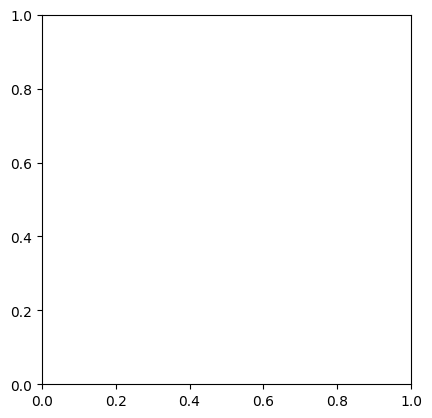

In [12]:
plt.imshow(img)
plt.show()

In [ ]:
# import cv2
# import os

# # Path to your video file
# video_path = "/mnt/local/Dreamlike_Diffusion_Pipeline/dataset/Bajirao.Mastani.2015.720p.BluRay.x264.Hindi.AAC-ETRG (1).mp4"

# # Output directory
# output_dir = "4k images"
# os.makedirs(output_dir, exist_ok=True)

# # Open the video
# cap = cv2.VideoCapture(video_path)

# frame_num = 0
# while True:
#     # Read the next frame
#     ret, frame = cap.read()
#     frame_num += 1

#     if(frame_num in frames_face):
#     # Construct the output filename
#         output_filename = f"{frame_num}.jpg"
#         output_path = os.path.join(output_dir, output_filename)

#     # Write the frame to disk
#         cv2.imwrite(output_path, frame)

# cap.release()
# print("Extraction completed!")


In [16]:
import cv2
import os

# Path to the video file
video_path = "/mnt/local/Dreamlike_Diffusion_Pipeline/dataset/Bajirao.Mastani.2015.720p.BluRay.x264.Hindi.AAC-ETRG (1).mp4"

# Folder to save the extracted frames
output_dir = "4k images"
os.makedirs(output_dir, exist_ok=True)

# Open the video
cap = cv2.VideoCapture(video_path)

# Get the frames-per-second (FPS) of the video
fps = cap.get(cv2.CAP_PROP_FPS)
# Number of frames to skip
skip_frames = int((fps/24) * 36)  # Adjust this value as needed

frame_index = 0
saved_frame_count = 0

while True:
    ret, frame = cap.read()
    # if not ret:
    #     break  # End of video or error reading frame

    # If the current frame index is a multiple of `skip_frames`, save this frame
    if frame_index % skip_frames == 0:
        saved_frame_count += 1
        if saved_frame_count in df['frame_time'].values:
            # Construct the output filename
            output_filename = f"{saved_frame_count}.jpg"
            output_path = os.path.join(output_dir, output_filename)
            cv2.imwrite(output_path, frame)
        # output_filename = f"{saved_frame_count}.jpg"
        # output_path = os.path.join(output_dir, output_filename)
        # cv2.imwrite(output_path, frame)

    frame_index += 1

cap.release()
print("Extraction completed!")


error: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [ ]:
df[df["frame_time"]==283]["captions"].values[0]


In [ ]:
import cv2
import os

for i in frames_face:
    img_path = f'downloaded_images/{i}.jpg'
    # Read the image
    img = cv2.imread(img_path)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.title(f'Frame {i}:{df[df['frame_time']==i]["captions"].values[0]}')
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()


In [ ]:
for i in frames_face:
    img_path = f'downloaded_images/{i}.jpg'
    # Read the image
    img = cv2.imread(img_path)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.title(f'Frame {i}:{df[df["frame_time"]==i]["captions"].values[0]}')
    

In [10]:
faces=[282,225,223,203,276,329,327,330,342]
for i in faces:
    img_path = f'downloaded_images/{i}.jpg'
    # Read the image
    img = cv2.imread(img_path)
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(img.shape)
    
    # Create directory if it doesn't exist
    if not os.path.exists('ranveer_face_images_4k_selected'):
        os.makedirs('ranveer_face_images_4k_selected')
        
    # Save the image
    cv2.imwrite(f'ranveer_face_images_4k_selected/{i}.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

(360, 450, 3)
(360, 450, 3)
(360, 450, 3)
(360, 450, 3)
(360, 450, 3)
(360, 450, 3)
(360, 450, 3)
(360, 450, 3)
(360, 450, 3)


In [ ]:
len(frames_face)